In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
sns.set(style="whitegrid")

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Credit card fraud/AIML Dataset.csv')

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Exloratory Data Analysis

In [17]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [18]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [21]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [26]:
df.shape

(6362620, 11)

In [31]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100, 3)

np.float64(0.129)

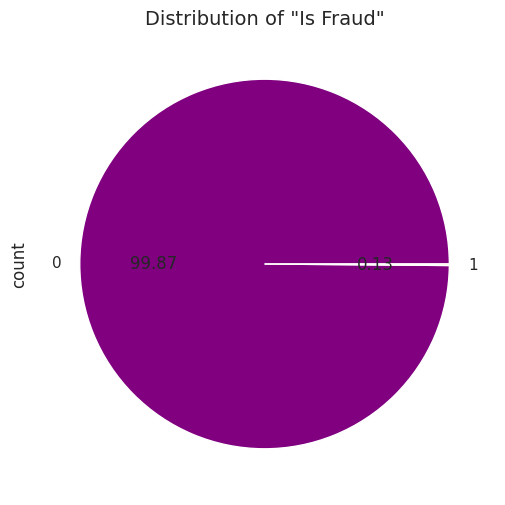

In [34]:
df['isFraud'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(12,6), colors=['purple', 'orange'])
plt.title('Distribution of "Is Fraud"', fontsize=14)
plt.show()

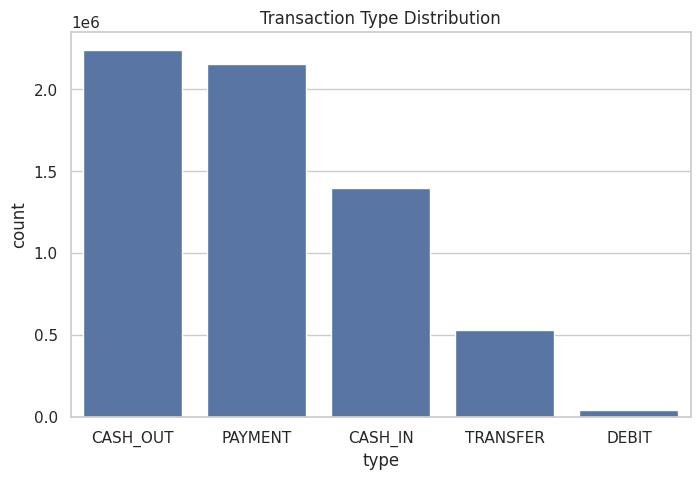

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title("Transaction Type Distribution")
plt.show()

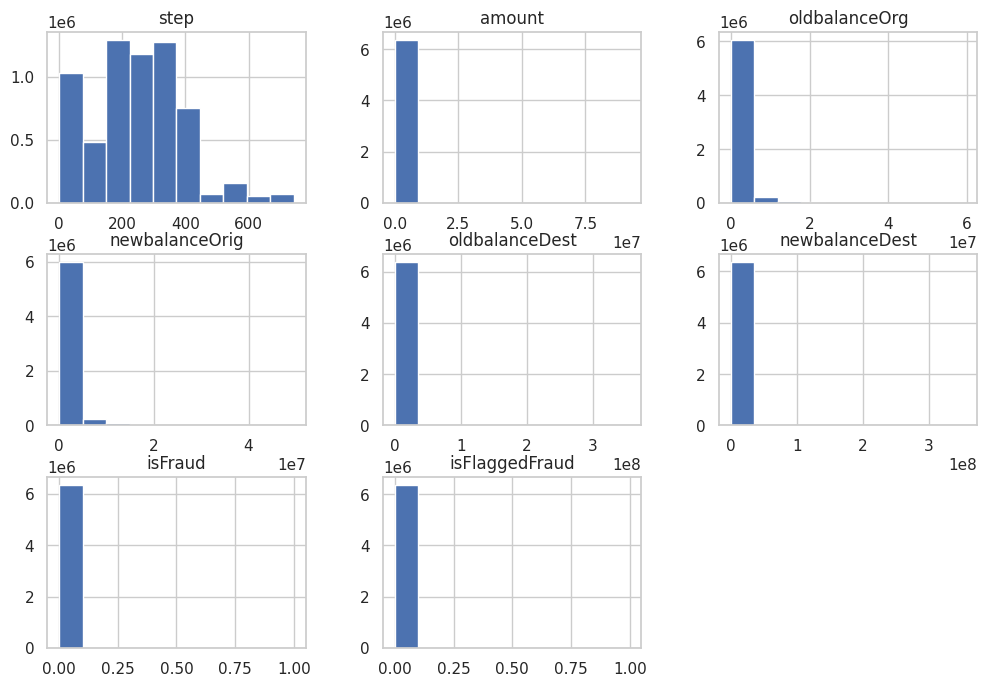

In [36]:
df.hist(figsize=(12,8))
plt.show()

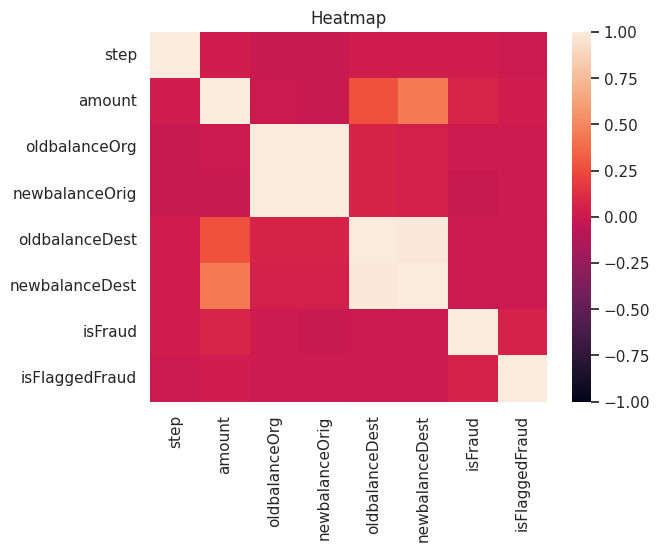

In [37]:
map = df.sample(200000, random_state=42)
corr = map.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, vmax=1, vmin=-1);
plt.title('Heatmap')
plt.show()

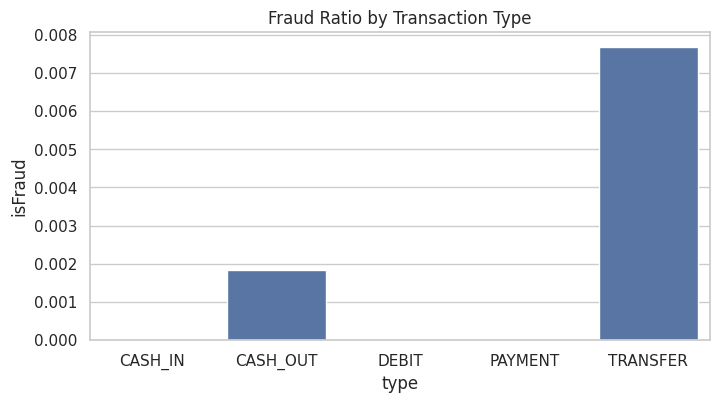

In [39]:
fraud_by_type = df.groupby("type")